In [75]:
import sys
sys.path.append('../')

In [76]:
from src import TSPCity
import matplotlib.pyplot as plt

city_a = TSPCity.City("City A", 0, 0)
city_b = TSPCity.City("City B", 1, 2)
city_c = TSPCity.City("City C", 3, 4)
city_d = TSPCity.City("City D", 2, 1)
city_e = TSPCity.City("City E", 5, 5)

cities = [city_a, city_b, city_c, city_d, city_e]

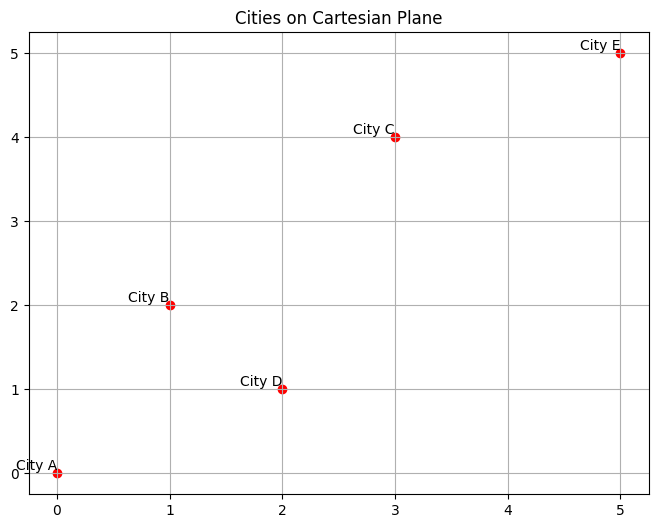

In [30]:
x = [city.x for city in cities]
y = [city.y for city in cities]

plt.figure(figsize=(8, 6))
    
for city in cities:
    plt.scatter(city.x, city.y, color='red')
    plt.text(city.x, city.y, city.name, fontsize=10, ha='right', va='bottom')

plt.title('Cities on Cartesian Plane')
plt.grid(True)
plt.show()

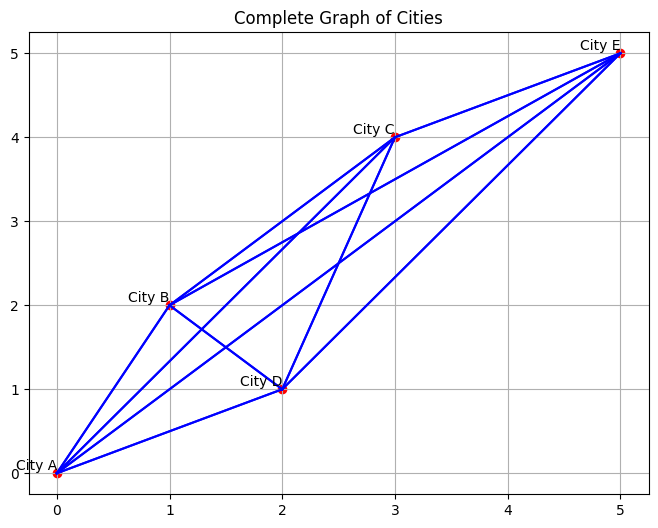

In [31]:
from src import TravellingSalesmanProblem

tsp = TravellingSalesmanProblem.TSP(city_a)
tsp.generate_complete_graph(cities)

complete_graph = tsp.graph

city_coordinates = list(complete_graph.keys())
edges = []
for city1 in city_coordinates:
    for city2, distance in complete_graph[city1].items():
        edges.append((city1, city2, distance))
        
plt.figure(figsize=(8, 6))

for city in city_coordinates:
    plt.scatter(city.x, city.y, color='red')
    plt.text(city.x, city.y, city.name, fontsize=10, ha='right', va='bottom')
    
for edge in edges:
    city1 = edge[0]
    city2 = edge[1]
    plt.plot([city1.x, city2.x], [city1.y, city2.y], color='blue')

plt.title('Complete Graph of Cities')
plt.grid(True)
plt.show()

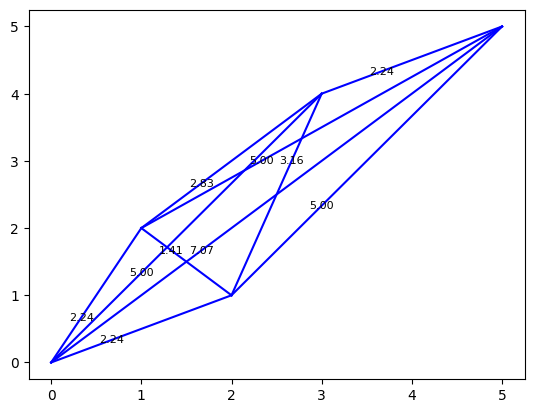

In [19]:
edges = []
for city1 in city_coordinates:
    for city2, distance in complete_graph[city1].items():
        edges.append((city1, city2, distance))
        
plotted_edges = set()

for edge in edges:
    city1 = edge[0]
    city2 = edge[1]
    distance = edge[2]
    
    if (city2, city1) not in plotted_edges and (city1, city2) not in plotted_edges:
        third_x = city1.x + (city2.x - city1.x) * 1/3
        third_y = city1.y + (city2.y - city1.y) * 1/3
        plt.plot([city1.x, city2.x], [city1.y, city2.y], color='blue')
        plt.text(third_x, third_y, f'{distance:.2f}', fontsize=8, ha='center', va='center')
        plotted_edges.add((city1, city2))

In [28]:
import networkx as nx

G = nx.Graph()
G.add_weighted_edges_from(edges)

min_hamiltonian_path = nx.approximation.traveling_salesman_problem(G, cycle=True)

for node in min_hamiltonian_path:
    city_info = str(node)
    print(city_info)
    
total_distance = 0
for i in range(len(min_hamiltonian_path) - 1):
    city1 = min_hamiltonian_path[i]
    city2 = min_hamiltonian_path[i + 1]
    if city1 in complete_graph and city2 in complete_graph[city1]:
        total_distance += complete_graph[city1][city2]
    else:
        pass
    
print(f"Total path distance: {total_distance}")

City A: (0, 0)
City B: (1, 2)
City C: (3, 4)
City E: (5, 5)
City D: (2, 1)
City A: (0, 0)
Total path distance: 14.53663105724556


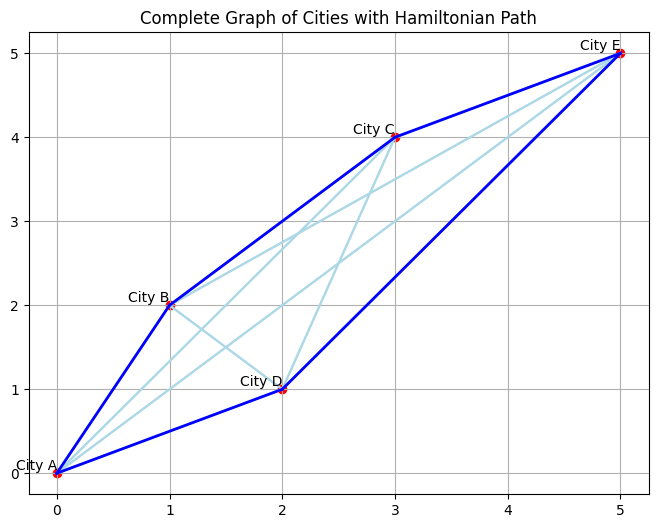

In [32]:
plt.figure(figsize=(8, 6))

for city in city_coordinates:
    plt.scatter(city.x, city.y, color='red')
    plt.text(city.x, city.y, city.name, fontsize=10, ha='right', va='bottom')

for edge in edges:
    city1 = edge[0]
    city2 = edge[1]
    plt.plot([city1.x, city2.x], [city1.y, city2.y], color='lightblue')

for i in range(len(min_hamiltonian_path) - 1):
    node1 = min_hamiltonian_path[i]
    node2 = min_hamiltonian_path[i + 1]
    plt.plot([node1.x, node2.x], [node1.y, node2.y], color='blue', linewidth=2)
    
node1 = min_hamiltonian_path[-1]
node2 = min_hamiltonian_path[0]
plt.plot([node1.x, node2.x], [node1.y, node2.y], color='blue', linewidth=2)

plt.title('Complete Graph of Cities with Hamiltonian Path')
plt.grid(True)
plt.show()

In [71]:
from src import SimulatedAnnealing as sa
from src import CoolingRate as cr

initial_temperature = 100
max_iterations = 2000

cooling_rate = cr.get_cooling_rate(initial_temperature, max_iterations)

result_path = sa.simulated_annealing(tsp, cooling_rate)
print("Result path:", [city.name for city in result_path])

length_result_state = tsp.calculate_path_length(result_path)
print("Length of the result path:", length_result_state)

Result path: ['City A', 'City D', 'City E', 'City C', 'City B', 'City A']
Length of the result path: 14.53663105724556
